# 🧠 **Model Training and Evaluation**

This notebook focuses on training, tuning, and evaluating multiple machine learning models for fraud detection on both original and augmented datasets. The goal is to identify the model that best balances recall, precision, and F1-score, ensuring maximum detection of fraudulent transactions while minimizing false positives.

The workflow includes:

  * Data preparation and preprocessing (feature encoding, scaling, handling imbalance).

  * Model training using algorithms such as Logistic Regression, Decision Tree, SGD, XGBoost, LightGBM, CatBoost, and Balanced Random Forest.

  * Hyperparameter tuning to optimize performance on the augmented data.

  * Evaluation and comparison based on metrics — Accuracy, Precision, Recall, and F1-score.

  * Insights and interpretation to select the most suitable model for real-world fraud detection scenarios.

The analysis highlights that while tree-based ensemble models like CatBoost and XGBoost achieve high recall (detecting most fraudulent cases), models such as LightGBM and Logistic Regression offer a better balance between sensitivity and precision.

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/GNCIPL_Internship_Projects/Finance/Notebook")

In [ ]:
!pwd
!ls

/content/drive/MyDrive/GNCIPL_Internship_Projects/Finance/Notebook
 app.py					  preprocess.py
 catboost_info				  __pycache__
'Exploratory Data Analysis (EDA).ipynb'   Synthetic_Data_Analysis.ipynb
 Model_Training.ipynb			  Visualization.ipynb


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/GNCIPL_Internship_Projects/Finance/Notebook")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import preprocess

import warnings
warnings.filterwarnings('ignore')

In [ ]:
original_data_path = "/content/drive/MyDrive/GNCIPL_Internship_Projects/Finance/Data/Bank_Transaction.csv"
augmented_data_path = "/content/drive/MyDrive/GNCIPL_Internship_Projects/Finance/Data/Augmented_data.csv"

# Preprocessing Data

### Preprocessing of Original Data

In [ ]:
original_data = pd.read_csv(original_data_path)

In [ ]:
# Displaying Original Data
original_data.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [ ]:
# Shape of original Data
original_data.shape

(200000, 24)

In [ ]:
# Target Label
original_label = original_data['Is_Fraud'].values

original_label.shape

(200000,)

In [ ]:
# Applying preprocessing on original data
original_data_preprocessed, pipeline = preprocess.fit_preprocess(original_data)

In [ ]:
# Shape of processed data
original_data_preprocessed.shape

(200000, 527)

In [ ]:
temp_df = pd.DataFrame(original_data_preprocessed)

temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
0,1.045534,-0.599702,0.807290,0.000005,0.000005,0.000005,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.862982,0.014148,0.651949,-1.474207,-0.706966,0.434772
1,0.456865,-0.207182,0.809676,0.000005,0.000005,0.000005,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.520739,1.045316,0.796519,-0.895676,-0.706966,0.584576
2,-1.570771,0.473684,0.524828,0.000005,0.000005,0.000005,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.093603,1.045316,-1.227458,-1.184941,1.414495,0.943796
3,0.849311,-1.244660,0.209460,0.000005,0.000005,0.000005,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.401742,1.560900,0.073670,-0.143587,-0.706966,0.240657
4,-0.066396,-1.092851,-1.325919,0.000005,0.000005,0.000005,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.670153,0.014148,0.941088,0.029973,-0.706966,1.138225


### Preprocessing of Augmentated Data

In [ ]:
augmented_data = pd.read_csv(augmented_data_path)

augmented_data.tail()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
234995,46eeede5-146f-4486-9781-6b0eda68879e,Arin Dhingra,Female,58,Andaman and Nicobar Islands,Car Nicobar,Car Nicobar Branch,Checking,2bad74d8-5b58-4505-afe3-d0decabd4eca,17-01-2025,...,Groceries,93570.64,Voice Assistant,"Car Nicobar, Andaman and Nicobar Islands",ATM,1,INR,+9191801XXXXXX,Property tax payment,arinXXX@XXXXX.com
234996,61294e08-3b5d-47c2-aae6-fbddebe159ed,Jalaja Singh,Male,56,Nagaland,Kohima,Kohima Branch,Savings,feafbaea-bfcd-4ab8-bdb9-1da6bcddff62,23-01-2025,...,Restaurant,84231.38,ATM Booth Kiosk,"Kohima, Nagaland",Desktop,1,INR,+9191975XXXXXX,Online clothing store,jalajaXXX@XXXXX.com
234997,dc5bbc7f-dbec-4ce5-93a0-effdf74eda63,Jeet Sane,Female,25,Punjab,Patiala,Patiala Branch,Business,fa9ccfc7-73ef-4937-bcb8-24acece72a78,17-01-2025,...,Entertainment,25600.04,POS Mobile App,"Patiala, Punjab",Mobile,1,INR,+9193211XXXXXX,Subscription fee,jeetXXXX@XXXXXXX.com
234998,97a0c18f-0ebb-443f-830d-673cc038584b,Madhavi Yogi,Female,22,Tripura,Udaipur,Udaipur Branch,Checking,1b93ceae-dabb-4aff-963c-067a42f4a269,23-01-2025,...,Electronics,14101.21,Payment Gateway Device,"Udaipur, Tripura",Desktop,1,INR,+9191080XXXXXX,Investment in gold,madhaviXXXX@XXXXX.com
234999,148134ff-8889-4195-9afb-249eacc7cbbe,Aryan Shukla,Female,29,Assam,Dibrugarh,Dibrugarh Branch,Business,f8595add-026e-4186-bad2-59c1a789eade,16-01-2025,...,Clothing,62379.03,Self-service Banking Machine,"Dibrugarh, Assam",ATM,1,INR,+9195434XXXXXX,Utility service,aryanXXXX@XXXXXXX.com


In [ ]:
# Shape of the Augmented Data
augmented_data.shape

(235000, 24)

In [ ]:
aug_label = augmented_data['Is_Fraud'].values

aug_label.shape

(235000,)

In [ ]:
augmented_data.duplicated().sum()

np.int64(0)

In [ ]:
#Shuffling the Dataset
augmented_data = augmented_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
augmented_data.tail()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
234995,f066eaa4-b5ce-4190-8f1c-729d7b5e2800,Gaurav Dora,Female,69,Andhra Pradesh,Visakhapatnam,Visakhapatnam Branch,Checking,2bb48e12-f322-45df-84ed-6cf2901ed538,11-01-2025,...,Entertainment,70753.13,Banking Chatbot,"Visakhapatnam, Andhra Pradesh",POS,0,INR,+9193243XXXXXX,Hiring fee,gauravXXXX@XXXXXXX.com
234996,c591009b-20f8-4113-acf6-4a936ad93e00,Ekani Devan,Female,28,Odisha,Sambalpur,Sambalpur Branch,Business,2b89a365-fb57-44f3-b89c-99ba030b0ee0,22-01-2025,...,Entertainment,45707.85,Payment Gateway Device,"Sambalpur, Odisha",ATM,1,INR,+9193169XXXXXX,Loan repayment,ekaniXXXX@XXXXXXX.com
234997,beb0f269-381f-4459-a21b-fc90a91559c3,Eshana Sur,Female,27,Jharkhand,Hazaribagh,Hazaribagh Branch,Savings,db9bc0a8-a28d-4e94-9109-546c6af39339,28-01-2025,...,Health,73065.57,Desktop/Laptop,"Hazaribagh, Jharkhand",POS,0,INR,+9194481XXXXXX,Transfer,eshanaXXXXX@XXXXX.com
234998,16e272f8-8f42-42ca-aaaf-7281097d3c9a,Nathan Khanna,Female,59,Assam,Jorhat,Jorhat Branch,Business,1049b1d7-bc19-4d7b-a9ea-74c9de23c02a,16-01-2025,...,Clothing,95630.03,Self-service Banking Machine,"Jorhat, Assam",POS,0,INR,+9192411XXXXXX,Hospital bill,nathanXXXXX@XXXXXX.com
234999,75994d16-ac1b-4c64-884c-aa99900201dd,Jacob Sehgal,Male,59,West Bengal,Asansol,Asansol Branch,Business,ab347b37-c7d9-4da6-828e-d8074b8eade1,18-01-2025,...,Health,65979.10,ATM,"Asansol, West Bengal",Mobile,0,INR,+9194350XXXXXX,Moving services payment,jacobXXX@XXXXXXX.com


In [ ]:
# Applying preprocessing on augmented data
augmented_data_preprocess = pipeline.transform(augmented_data)

In [ ]:
augmented_data_preprocess.shape

(235000, 526)

# **Model Development**

In [ ]:
!pip install catboost

In [ ]:
# -------------------- Imports --------------------
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# -------------------- Define classifiers --------------------
clfs = {
    # Linear Models
    'LR': LogisticRegression(solver='liblinear', penalty='l1', class_weight='balanced', max_iter=1000),
    'SGD': SGDClassifier(loss='log_loss', class_weight='balanced', max_iter=1000, tol=1e-3, n_jobs=-1),

    # Tree-based models
    'DT': DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
    'BRF': BalancedRandomForestClassifier(n_estimators=50, random_state=2, n_jobs=-1),

    # Gradient Boosting
    'XGB': XGBClassifier(n_estimators=50, random_state=2, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=6),  # approximate imbalance ratio
    'LGBM': lgb.LGBMClassifier(n_estimators=50, random_state=2, class_weight='balanced'),
    'CatBoost': CatBoostClassifier(iterations=50, random_state=2, verbose=0, class_weights=[1,6])
}

In [ ]:
# ---- Training function ----
def train_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    return accuracy, precision, recall

In [ ]:
def evaluate_models(X, y, dataset_name="Dataset"):
    results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": [], "Estimator": []}

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        stratify=y,
        random_state=42
    )

    print("Model Training Started ......")
    for name, clf in clfs.items():

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f'{name} Model training completed.')
        results["Model"].append(name),
        results["Accuracy"].append(accuracy_score(y_test, y_pred))
        results["Precision"].append(precision_score(y_test, y_pred, zero_division=0))
        results["Recall"].append(recall_score(y_test, y_pred, zero_division=0))
        results["F1"].append(f1_score(y_test, y_pred, zero_division=0))
        results["Estimator"].append(clf)

    results_df = pd.DataFrame(results)
    print(f"\n📊 Model Performance on {dataset_name}:")
    display(results_df)


    return results_df

In [ ]:
def get_best_model(results_df, metric="F1"):
    best_idx = results_df[metric].idxmax()
    best_model_name = results_df.loc[best_idx, "Model"]
    best_model = results_df.loc[best_idx, "Estimator"]
    print(f"\n✅ Best model: {best_model_name} ({metric} = {results_df.loc[best_idx, metric]:.4f})")
    return best_model

### Training Model on Original Data

In [ ]:
# ---- Run on Original Data ----
y_original = original_label
X_original = original_data_preprocessed

results_original = evaluate_models(X_original, y_original, dataset_name="Original Data")

Model Training Started ......
LR Model training completed.
SGD Model training completed.
DT Model training completed.
BRF Model training completed.
XGB Model training completed.
[LightGBM] [Info] Number of positive: 8070, number of negative: 151930
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1972
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 521
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
LGBM Model training completed.
CatBoost Model training completed.

📊 Model Performance on Original Data:


,Model,Accuracy,Precision,Recall,F1,Estimator
0,LR,0.500875,0.050988,0.504955,0.092624,"LogisticRegression(class_weight='balanced', ma..."
1,SGD,0.299075,0.050109,0.718038,0.093680,"SGDClassifier(class_weight='balanced', loss='l..."
2,DT,0.918775,0.053662,0.036670,0.043568,DecisionTreeClassifier(class_weight='balanced'...
3,BRF,0.883375,0.051508,0.075322,0.061179,"(DecisionTreeClassifier(max_features='sqrt', r..."
4,XGB,0.947700,0.079545,0.003469,0.006648,"XGBClassifier(base_score=None, booster=None, c..."
5,LGBM,0.625600,0.047998,0.340932,0.084149,"LGBMClassifier(class_weight='balanced', n_esti..."
6,CatBoost,0.946775,0.056000,0.003469,0.006533,<catboost.core.CatBoostClassifier object at 0x...


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Metrics to plot
metrics = ["Accuracy", "Precision", "Recall", "F1"]
models = results_original["Model"]

# Create subplot figure: 1 row, 4 columns (one per metric)
fig = make_subplots(rows=1, cols=4, subplot_titles=metrics)

for i, metric in enumerate(metrics):
    fig.add_trace(
        go.Bar(
            x=models,
            y=results_original[metric],
            text=results_original[metric].round(3),
            textposition='auto',
            name=metric
        ),
        row=1, col=i+1
    )

fig.update_layout(
    title_text="Original Data - Model Metrics Comparison",
    showlegend=False,
    height=500, width=1200,
    margin=dict(t=50, b=50)
)

fig.show()


### Training Model on Augmented Data

In [ ]:
# ---- Run on Augmented Data ----

y_augmented = aug_label
X_augmented = augmented_data_preprocess

results_augmented = evaluate_models(X_augmented, y_augmented, dataset_name="Augmented Data")

Model Training Started ......
LR Model training completed.
SGD Model training completed.
DT Model training completed.
BRF Model training completed.
XGB Model training completed.
[LightGBM] [Info] Number of positive: 32417, number of negative: 155583
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1723
[LightGBM] [Info] Number of data points in the train set: 188000, number of used features: 523
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
LGBM Model training completed.
CatBoost Model training completed.

📊 Model Performance on Augmented Data:


,Model,Accuracy,Precision,Recall,F1,Estimator
0,LR,0.508255,0.173455,0.491856,0.256466,"LogisticRegression(class_weight='balanced', ma..."
1,SGD,0.512277,0.172392,0.481120,0.253833,"SGDClassifier(class_weight='balanced', loss='l..."
2,DT,0.525021,0.174838,0.471742,0.255122,DecisionTreeClassifier(class_weight='balanced'...
3,BRF,0.757681,0.163904,0.098840,0.123316,"(DecisionTreeClassifier(max_features='sqrt', r..."
4,XGB,0.285723,0.172854,0.830207,0.286133,"XGBClassifier(base_score=None, booster=None, c..."
5,LGBM,0.452596,0.173388,0.577246,0.266674,"LGBMClassifier(class_weight='balanced', n_esti..."
6,CatBoost,0.244596,0.171258,0.880676,0.286753,<catboost.core.CatBoostClassifier object at 0x...


In [ ]:
# Metrics to plot
metrics = ["Accuracy", "Precision", "Recall", "F1"]
models = results_augmented["Model"]

# Create subplot figure: 1 row, 4 columns (one per metric)
fig = make_subplots(rows=1, cols=4, subplot_titles=metrics)

for i, metric in enumerate(metrics):
    fig.add_trace(
        go.Bar(
            x=models,
            y=results_augmented[metric],
            text=results_augmented[metric].round(3),
            textposition='auto',
            name=metric
        ),
        row=1, col=i+1
    )

fig.update_layout(
    title_text="Augmented Data - Model Metrics Comparison",
    showlegend=False,
    height=500, width=1200,
    margin=dict(t=50, b=50)
)

fig.show()


# **Model Comparison and Insights**

## 📊 ***Ranking by F1 Score (Augmented Data)***

| Rank | Model                            | F1         | Recall | Precision | Accuracy |
| ---- | -------------------------------- | ---------- | ------ | --------- | -------- |
| 🥇 1 | **CatBoost**                     | **0.2868** | 0.8807 | 0.1713    | 0.2446   |
| 🥈 2 | **XGBoost (XGB)**                | **0.2861** | 0.8302 | 0.1729    | 0.2857   |
| 🥉 3 | **LightGBM (LGBM)**              | **0.2667** | 0.5772 | 0.1734    | 0.4526   |
| 4    | **Logistic Regression (LR)**     | 0.2565     | 0.4919 | 0.1735    | 0.5083   |
| 5    | **Decision Tree (DT)**           | 0.2551     | 0.4717 | 0.1748    | 0.5250   |
| 6    | **SGD Classifier (SGD)**         | 0.2538     | 0.4811 | 0.1724    | 0.5123   |
| 7    | **Balanced Random Forest (BRF)** | 0.1233     | 0.0988 | 0.1639    | 0.7577   |


✅ Key Insights

* CatBoost and XGBoost achieved the highest F1-scores (~0.286), driven by very high recall (≈0.88 and 0.83).

* These models are highly sensitive to fraudulent cases — ideal when catching fraud is more important than reducing false alarms.

* LightGBM provides a better trade-off between accuracy (45%) and F1 (0.26), indicating stronger overall balance in classification.

* Logistic Regression (LR) and Decision Tree (DT) perform moderately well, maintaining stable recall around 0.47–0.49, but still suffer from low precision.

* SGD Classifier delivers results similar to LR and DT, showing that linear models with class balancing can remain competitive when data is augmented.

* Balanced Random Forest (BRF), despite its high accuracy (75%), fails to detect minority (fraud) cases effectively — indicating it’s biased toward non-fraud transactions.

## **Selecting the Best Model for Hypertuning**
-------------------------------------------------
### ***Hyperparameter Tuning***
* **Definition**: The process of optimizing model hyperparameters that are set before training and control how the learning process works.

* **Difference**: Unlike model parameters (learned during training), hyperparameters must be chosen manually or through search strategies.


* **Why important**: Correct hyperparameter choices improve accuracy, generalization, and efficiency while preventing overfitting or underfitting.

* **Selected models**: Logistic Regression, Random Forest, XGBoost, LightGBM, and CatBoost — chosen as they are highly sensitive to hyperparameter settings.

* **Key parameters tuned**:

  * Tree-based models → depth, number of estimators, minimum samples per split

  * Boosting models → learning rate, regularization terms, scale for class imbalance

  * Logistic Regression/SGD → penalty type, solver, and regularization strength

* **Purpose in project**: To maximize performance metrics (especially Recall and F1-score) for fraud detection while handling class imbalance effectively.


# **Applying Hyperparameter Tunning to Improve Performance**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# ---------------- Select models ----------------
import lightgbm as lgb
from catboost import CatBoostClassifier
import xgboost as xgb

In [ ]:
# ---------------- Hyperparameter grids ----------------
param_grid = {
    "XGB" : {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 10],
        "learning_rate": [0.01, 0.05, 0.1],
    },
    "LGBM": {
        "n_estimators": [100, 200],
        "max_depth": [-1, 5, 10],
        "learning_rate": [0.01, 0.05, 0.1],
        "num_leaves": [31, 50, 100],
        "class_weight": ["balanced"]
    },
    "CatBoost": {
    "iterations": [200, 500, 1000],
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "l2_leaf_reg": [1, 3, 5, 7, 10],
    "subsample": [0.8, 1.0],
    "colsample_bylevel": [0.7, 0.9, 1.0],
    "class_weights": ["Balanced", [1, 5], [1, 10]]
    }
}

In [ ]:
models = {
    "XGB": xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",   # avoids warnings
        use_label_encoder=False,
        n_jobs=-1,
        random_state=2,
        scale_pos_weight=1       # can be tuned later for imbalance
    ),

    "LGBM": lgb.LGBMClassifier(
        objective="binary",
        boosting_type="gbdt",
        n_jobs=-1,
        random_state=2,
        class_weight="balanced"
    ),

    "CatBoost": CatBoostClassifier(
        eval_metric="F1",        # useful for fraud detection
        logging_level="Silent", # suppresses training logs
        random_state=2
    )
}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_augmented,y_augmented, test_size=0.2,stratify=y_augmented, random_state=42)

In [ ]:
# Number of random parameter combinations to try
best_models = {}
n_iter_search = 50

# ---------------- Run RandomizedSearchCV ----------------
for name, model in models.items():
    print(f"\n🔍 Tuning {name} with RandomizedSearchCV...")

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid[name],
        n_iter=n_iter_search,
        scoring="f1",
        cv=3,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    search.fit(X_train, y_train)
    best_models[name] = search.best_estimator_

    print(f"✅ Best {name}: {search.best_params_}")


🔍 Tuning XGB with RandomizedSearchCV...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
✅ Best XGB: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}

🔍 Tuning LGBM with RandomizedSearchCV...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 32417, number of negative: 155583
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1723
[LightGBM] [Info] Number of data points in the train set: 188000, number of used features: 523
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
✅ Best LGBM: {'num_leaves': 31, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01, 'class_weight': 'balanced'}

🔍 Tuning CatBoost with RandomizedSearc

KeyboardInterrupt: 

In [ ]:
best_models['CatBoost'] = CatBoostClassifier(
    iterations=600,       # medium number of trees
    depth=8,              # tree depth
    learning_rate=0.03,   # moderate learning rate
    l2_leaf_reg=3,        # regularization
    subsample=0.8,        # row sampling
    colsample_bylevel=0.7,# feature sampling
    class_weights=[1,3],# handle class imbalance
    eval_metric='Precision',     # metric to optimize
    random_state=2,
    logging_level='Silent'
)

## Retraining Models on Tuned Hyperparameters

In [ ]:
import plotly.express as px

# Retrain and evaluate best models
final_models = {}
results = []

for name, model in best_models.items():
    print(f"\n🔄 Retraining {name} on full training data with best hyperparameters...")

    # Fit model on the entire training set
    model.fit(X_train, y_train)

    # Store the retrained model
    final_models[name] = model

    print(f"✅ {name} retrained successfully!")

    # -------- Evaluation on test set --------
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "Estimator": model
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1", ascending=False).reset_index(drop=True)

# Melt the dataframe to long format, exclude Accuracy
df_melt = results_df.melt(id_vars="Model",
                          value_vars=["Precision", "Recall", "F1"],
                          var_name="Metric",
                          value_name="Score")

# Plot grouped bar chart
fig = px.bar(df_melt,
             x="Model",
             y="Score",
             color="Metric",
             barmode="group",
             text="Score",
             title="📊 Model Performance Comparison on Test Data (Precision, Recall, F1)",
             height=500)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis=dict(range=[0,1]), xaxis_title="Model", yaxis_title="Score")
fig.show()


🔄 Retraining XGB on full training data with best hyperparameters...
✅ XGB retrained successfully!

🔄 Retraining LGBM on full training data with best hyperparameters...
[LightGBM] [Info] Number of positive: 32417, number of negative: 155583
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1723
[LightGBM] [Info] Number of data points in the train set: 188000, number of used features: 523
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
✅ LGBM retrained successfully!

🔄 Retraining CatBoost on full training data with best hyperparameters...
✅ CatBoost retrained successfully!


In [ ]:
classes = np.unique(y_train)
class_counts = np.bincount(y_train)
total = len(y_train)
class_weights = [total / class_counts[i] for i in range(len(classes))]

print("Class weights:", class_weights)

Class weights: [np.float64(1.2083582396534325), np.float64(5.799426226979671)]


In [ ]:
# ---------------- Imports ----------------
import pandas as pd
import numpy as np
import plotly.express as px
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# ---------------- 1️⃣ Train CatBoost ----------------
cat_model = CatBoostClassifier(
    iterations=600,
    depth=8,
    learning_rate=0.03,
    l2_leaf_reg=3,
    subsample=0.8,
    colsample_bylevel=0.7,
    class_weights=None,
    eval_metric='F1',
    random_state=2,
    logging_level='Silent'
)

cat_model.fit(X_train, y_train)

# ---------------- 2️⃣ Predict probabilities ----------------
y_probs = cat_model.predict_proba(X_test)[:, 1]  # probability of fraud

# ---------------- 3️⃣ Top-N ranking ----------------
df_pred = pd.DataFrame({'y_true': y_test, 'y_prob': y_probs})
df_pred = df_pred.sort_values(by='y_prob', ascending=False).reset_index(drop=True)

# Flag top  transactions as fraud (adjustable)
top_percent = 0.35
N = int(top_percent * len(df_pred))
df_pred['y_pred'] = 0
df_pred.loc[:N-1, 'y_pred'] = 1

# ---------------- 4️⃣ Evaluate ----------------
precision = precision_score(df_pred['y_true'], df_pred['y_pred'])
recall = recall_score(df_pred['y_true'], df_pred['y_pred'])
f1 = f1_score(df_pred['y_true'], df_pred['y_pred'])

print(f"Top-{int(top_percent*100)}% Flagging:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# ---------------- 5️⃣ Plot Precision/Recall vs Top-N ----------------
# Optional: plot precision/recall as you vary top-N %
percent_range = np.linspace(0.01, 0.2, 20,50)  # 1% to 20%
prec_list, rec_list, f1_list = [], [], []

for p in percent_range:
    n_flag = int(p * len(df_pred))
    y_pred_temp = np.zeros(len(df_pred))
    y_pred_temp[:n_flag] = 1

    prec_list.append(precision_score(df_pred['y_true'], y_pred_temp))
    rec_list.append(recall_score(df_pred['y_true'], y_pred_temp))
    f1_list.append(f1_score(df_pred['y_true'], y_pred_temp))

df_curve = pd.DataFrame({
    'TopPercent': percent_range,
    'Precision': prec_list,
    'Recall': rec_list,
    'F1': f1_list
})

df_melt = df_curve.melt(id_vars='TopPercent', value_vars=['Precision','Recall','F1'],
                         var_name='Metric', value_name='Score')

fig = px.line(df_melt, x='TopPercent', y='Score', color='Metric',
              title='Precision, Recall, F1 vs Top-N % Flagged',
              height=500)
fig.update_layout(yaxis=dict(range=[0,1]))
fig.show()


Top-35% Flagging:
Precision: 0.174
Recall: 0.354
F1 Score: 0.233


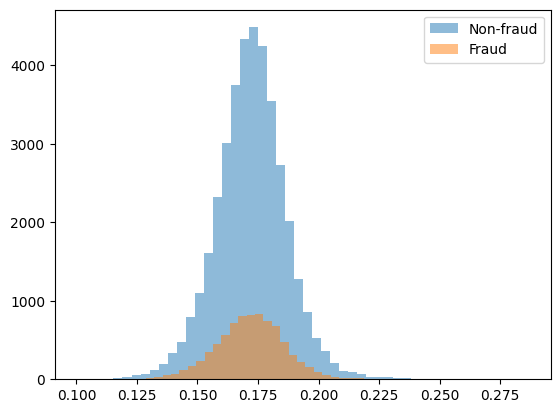

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y_probs[y_test==0], bins=50, alpha=0.5, label="Non-fraud")
plt.hist(y_probs[y_test==1], bins=50, alpha=0.5, label="Fraud")
plt.legend()
plt.show()


# Building a Deep Learning Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score, precision_recall_curve
import tensorflow as tf

In [ ]:
# ---------------- 1️⃣ Split data ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X_augmented, y_augmented, test_size=0.2, random_state=42, stratify=y_augmented
)

# ---------------- 2️⃣ Compute class weights ----------------
# Balances the loss to give more importance to minority class
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

Class weights: {0: np.float64(0.6041791198267162), 1: np.float64(2.8997131134898355)}


In [ ]:
# ---------------- 3️⃣ Define Focal Loss ----------------
def focal_loss(gamma=2., alpha=0.25):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        alpha_factor = y_true * alpha + (1 - y_true) * (1 - alpha)
        modulating_factor = tf.pow(1.0 - p_t, gamma)
        return tf.reduce_mean(alpha_factor * modulating_factor * bce)
    return loss

In [ ]:
# ---------------- 4️⃣ Build the model ----------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss=focal_loss(gamma=2, alpha=0.25),
    metrics=[Precision(name='precision'), Recall(name='recall')]
)

In [ ]:
# ---------------- 5️⃣ Early stopping ----------------
early_stop = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [ ]:
# ---------------- 6️⃣ Train the model ----------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=1024,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/50
147/147 - 1s - 6ms/step - loss: 0.0204 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0206 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
147/147 - 1s - 4ms/step - loss: 0.0201 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0205 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
147/147 - 1s - 4ms/step - loss: 0.0200 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0205 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
147/147 - 1s - 4ms/step - loss: 0.0199 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0207 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
147/147 - 1s - 4ms/step - loss: 0.0198 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0206 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/50
147/147 - 1s - 4ms/step - loss: 0.0197 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0205 - val_precision: 0.0000e+00 - val_recall: 0.0000e+0

In [ ]:
# ---------------- 7️⃣ Predict probabilities ----------------
y_probs = model.predict(X_test)

1469/1469 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
# ---------------- 8️⃣ Optimize threshold ----------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best threshold for F1-score: {best_threshold:.3f}")


Best threshold for F1-score: 0.083


In [ ]:
# ---------------- 9️⃣ Apply threshold ----------------
y_pred = (y_probs > best_threshold).astype(int)

# ---------------- 🔟 Evaluate ----------------
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8528    0.0101    0.0200     38896
           1     0.1727    0.9916    0.2941      8104

    accuracy                         0.1794     47000
   macro avg     0.5127    0.5009    0.1571     47000
weighted avg     0.7355    0.1794    0.0673     47000



# Saving Model with Best Result

In [ ]:
import joblib

# ✅ Save best model (on augmented data)
best_model_augmented = get_best_model(results_augmented, metric="F1")
# Find the row with the highest recall

joblib.dump(best_model_augmented, "/content/drive/MyDrive/GNCIPL_Internship_Projects/Finance/Model/best_model_augmented.pkl")
print("✅ Best augmented model saved as best_model_augmented.pkl")

# ✅ Save preprocessing pipeline
# joblib.dump(pipeline, "/content/drive/MyDrive/GNCIPL_Internship_Projects/Finance/Model/preprocess_pipeline.pkl")
# print("✅ Preprocessing pipeline saved as preprocess_pipeline.pkl")



✅ Best model: CatBoost (F1 = 0.2868)
✅ Best augmented model saved as best_model_augmented.pkl


In [ ]:
best_recall_row = results_df.loc[results_df["Recall"].idxmax()]

# Extract the corresponding model
best_recall_model = best_recall_row["Estimator"]

# Save as pkl
joblib.dump(best_recall_model, "/content/drive/MyDrive/GNCIPL_Internship_Projects/Finance/Model/catboost_best_model.pkl")

print("✅ CatBoost model with highest recall saved as 'catboost_best_recall.pkl'")

✅ CatBoost model with highest recall saved as 'catboost_best_recall.pkl'
